<a href="https://colab.research.google.com/github/JunyuYan/Pytorch-Learning-Materials/blob/main/pytorch_official/Datasets_%26_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch provides two data primitives to allow users to use pre-loaded data or their own data:
> **torch.utils.data.DataLoader**: wraps an iterable around the Dataset to enable easy access to the samples


> **torch.utils.data.Dataset**: stores the samples and their corresponding labels

Pytorch domain libraries provide a number of pre-loaded datasets that subclass torch.utils.data.Dataset and implement functions specific to the particular data. More imformation about the pre-loaded image. text and audio Datasets can be found here: [vision](https://pytorch.org/vision/stable/datasets.html), [text](https://pytorch.org/text/stable/datasets.html), and [audio](https://pytorch.org/audio/stable/datasets.html).


**Topic 1: Loading a Dataset**

Take Fashion-MNIST as an example:

For loading Fashion-MNIST, we need specify the following parameters:


*   root: the path where the train/test data is stored
*   train: specifies training or test data
*   download=True: downloads data from the Internet if it's not available at root
*   transform and target_transform: specify the feature and label transformations



In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15244400.76it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269193.63it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4998714.48it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16751184.63it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



**Topic 2: Iterating and Visualizing the Dataset**

training_data[index]: index Datasets manually as a list

matplotlib: visualize some samples in the datasets

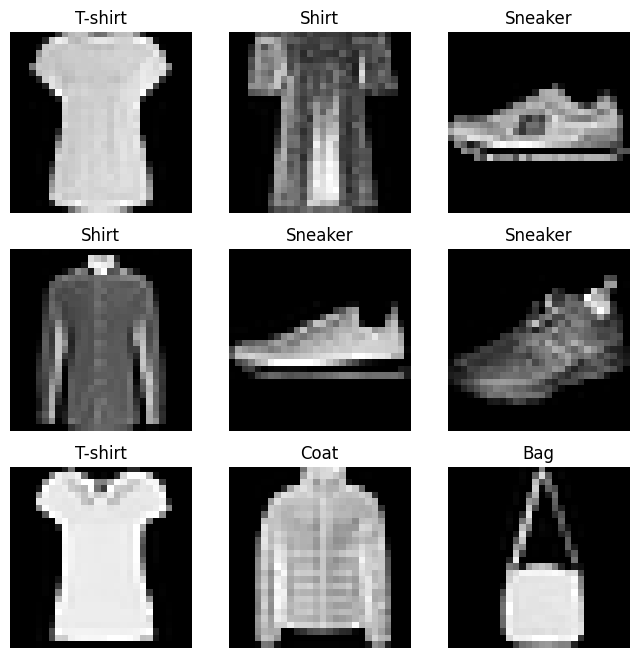

In [4]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_index = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_index]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray") # torch.squeeze: squeeze data, remove the dimension equals to 1; cmap means color map, maps scalar data to colors
plt.show()


**Topic 3: Creating a Custom Dataset for your files**

A custom Dataset class must implement three functions:


1.   \_\_init\_\_: runs once, initialize the directory containing the images, the annotations file, and both transforms
2.   \_\_len\_\_: returns the number of samples in our dataset
3.   \_\_getitem\_\_: loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image's location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.





Take FashionMNIST as an example:

The FashionMNIST images are stored in a directory *img_dir*, and their lables are stored seperately in a CSV file *annotations_file*

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None,
               target_transform=None):
    self.img_labels = pd.read_csv(img_dir)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label

**Topic 4: Preparing your data for training with DataLoaders**

DataLoader is an iterable that can pass samples in minibatch, reshuffle the data, and use Python's multiprocessing to speed up retrieval in an easy API.

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

**Topic 5: Iterate through the DataLoader:**

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


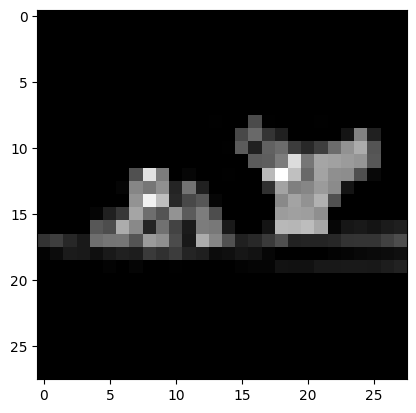

Label: 5


In [7]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")